# Bootcamp Data Science ING #

## Projekt zaliczeniowy ##

### Wojciech Siekiera ###

## Temat nr 1 - przewidywanie ceny domów ##
Celem projektu jest zastosowanie modeli regresji do przewidzenia ceny domu o podanych cechach.

In [123]:
# Importuję niezbędne biblioteki
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import numpy as np
from sklearn import metrics

Poniższy plik z danymi został pobrany z adresu: [dane](https://web.stanford.edu/class/stats191/data/ames2000_NAfix.csv) Dokładny opis danych znajduje się tu: [dokumentacja](http://web.stanford.edu/class/stats191/data/amesdoc.txt)

Oba pliki zostały umieszczone w katalogu z projektem. 

In [124]:
# Do zmiennej data wczytuję plik z danymi.
data = pd.read_csv("ames2000_NAfix.csv")

In [125]:
# Dane mają 2000 wierszy i 80 kolumn.
data.shape

(2000, 80)

In [126]:
# Informacje o danych w poszczególnych kolumnach.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 80 columns):
MS.SubClass        2000 non-null int64
MS.Zoning          2000 non-null object
Lot.Frontage       2000 non-null object
Lot.Area           2000 non-null int64
Street             2000 non-null object
Alley              2000 non-null object
Lot.Shape          2000 non-null object
Land.Contour       2000 non-null object
Utilities          2000 non-null object
Lot.Config         2000 non-null object
Land.Slope         2000 non-null object
Neighborhood       2000 non-null object
Condition.1        2000 non-null object
Condition.2        2000 non-null object
Bldg.Type          2000 non-null object
House.Style        2000 non-null object
Overall.Qual       2000 non-null int64
Overall.Cond       2000 non-null int64
Year.Built         2000 non-null int64
Year.Remod.Add     2000 non-null int64
Roof.Style         2000 non-null object
Roof.Matl          2000 non-null object
Exterior.1st       

Na powyższym listingu widać, że w niektórych kolumnach zdarzają się wartości puste. Uzupełniam je.

In [127]:
data['Mas.Vnr.Type'].fillna("None", inplace=True)
data['Bsmt.Qual'].fillna("NA", inplace=True)
data['Bsmt.Cond'].fillna("NA", inplace=True)
data['Bsmt.Exposure'].fillna("NA", inplace=True)
data['BsmtFin.Type.1'].fillna("NA", inplace=True)
data['BsmtFin.Type.2'].fillna("NA", inplace=True)
data['Garage.Finish'].fillna("NA", inplace=True)
data['Garage.Qual'].fillna("NA", inplace=True)
data['Garage.Cond'].fillna("NA", inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 80 columns):
MS.SubClass        2000 non-null int64
MS.Zoning          2000 non-null object
Lot.Frontage       2000 non-null object
Lot.Area           2000 non-null int64
Street             2000 non-null object
Alley              2000 non-null object
Lot.Shape          2000 non-null object
Land.Contour       2000 non-null object
Utilities          2000 non-null object
Lot.Config         2000 non-null object
Land.Slope         2000 non-null object
Neighborhood       2000 non-null object
Condition.1        2000 non-null object
Condition.2        2000 non-null object
Bldg.Type          2000 non-null object
House.Style        2000 non-null object
Overall.Qual       2000 non-null int64
Overall.Cond       2000 non-null int64
Year.Built         2000 non-null int64
Year.Remod.Add     2000 non-null int64
Roof.Style         2000 non-null object
Roof.Matl          2000 non-null object
Exterior.1st       

In [128]:
data.describe()

,MS.SubClass,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,...,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,SalePrice
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,56.945000,10296.665000,6.082000,5.574000,1971.079500,1984.013500,1158.715500,334.380500,4.379000,1497.475000,...,93.058500,46.335000,23.936500,2.116000,15.681500,2.934000,42.51300,6.217500,2007.799500,180240.902000
std,42.699281,8828.208491,1.387169,1.105502,29.985426,20.881771,379.701015,427.519973,42.555738,498.561719,...,126.633128,65.685433,66.144388,20.668119,54.270505,41.080828,440.83108,2.726336,1.316118,78461.927874
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,407.000000,0.000000,0.000000,407.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,2006.000000,12789.000000
25%,20.000000,7500.000000,5.000000,5.000000,1954.000000,1965.000000,877.750000,0.000000,0.000000,1126.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4.000000,2007.000000,129000.000000
50%,50.000000,9465.000000,6.000000,5.000000,1972.000000,1993.000000,1088.000000,0.000000,0.000000,1447.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.00000,6.000000,2008.000000,160000.000000
75%,70.000000,11500.000000,7.000000,6.000000,2000.000000,2004.000000,1391.250000,703.250000,0.000000,1734.000000,...,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.00000,8.000000,2009.000000,213492.500000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,4692.000000,2065.000000,697.000000,5642.000000,...,870.000000,742.000000,1012.000000,320.000000,480.000000,800.000000,15500.00000,12.000000,2010.000000,755000.000000


Na histogramach można zobaczyć w jaki sposób rozkładają się dane.

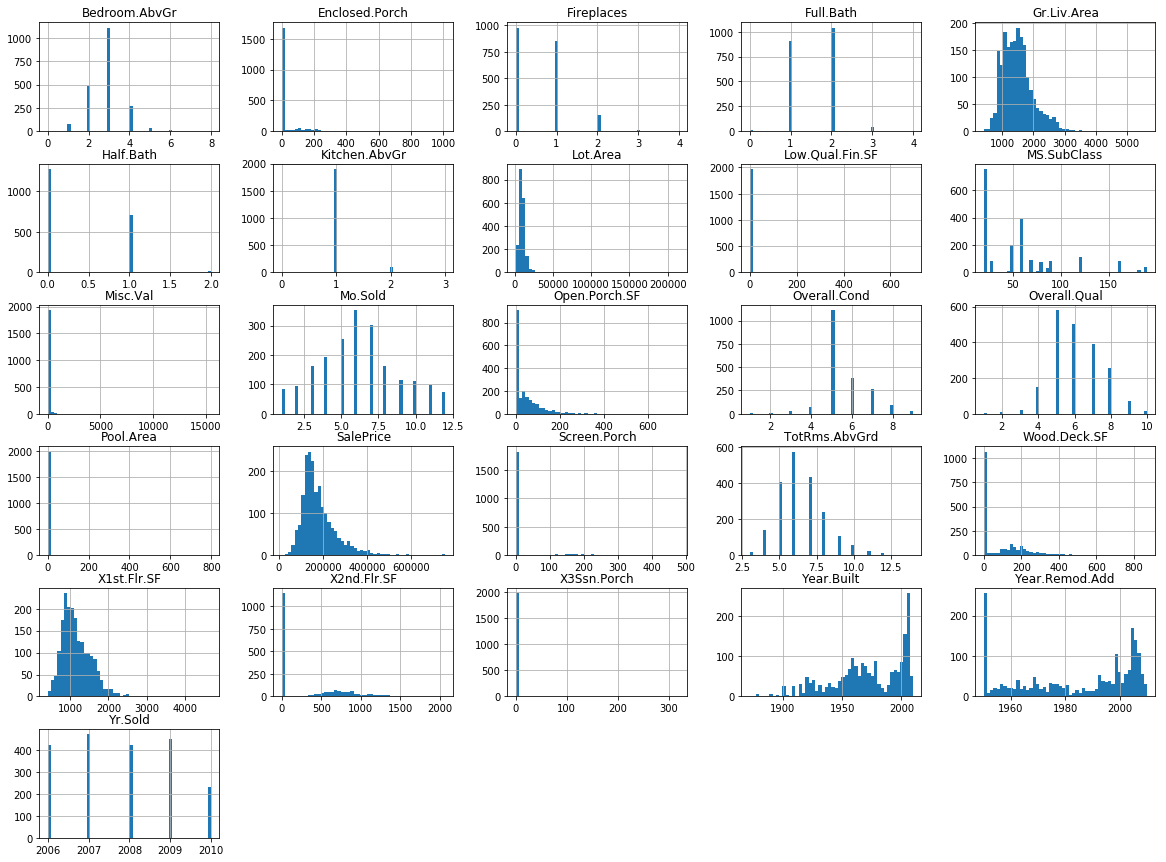

In [129]:
data.hist(bins=50, figsize=(20,15))
plt.show()

Tworzę macież korelacji, aby zobaczyć które z kolumn pozostają w korelacji z cechą która nas interesuje (cena nieruchomości).

In [130]:
corr_matrix = data.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice          1.000000
Overall.Qual       0.804547
Gr.Liv.Area        0.720922
X1st.Flr.SF        0.619121
Year.Built         0.571716
Full.Bath          0.561228
Year.Remod.Add     0.534962
TotRms.AbvGrd      0.504280
Fireplaces         0.480794
Wood.Deck.SF       0.329369
Open.Porch.SF      0.316206
X2nd.Flr.SF        0.295930
Half.Bath          0.287468
Lot.Area           0.243990
Bedroom.AbvGr      0.153925
Screen.Porch       0.098473
Pool.Area          0.083649
Mo.Sold            0.032680
X3Ssn.Porch        0.030149
Misc.Val          -0.011754
Yr.Sold           -0.028304
Low.Qual.Fin.SF   -0.051056
MS.SubClass       -0.075202
Overall.Cond      -0.120190
Enclosed.Porch    -0.128352
Kitchen.AbvGr     -0.129682
Name: SalePrice, dtype: float64

Powyżej widzimy cechy pozostające w korelacji z ceną sprzedaży posortowane wg istotności. Przetłumaczę znaczenie poszczególnych cech (z dokumentacji):
- SalePrice - cena sprzedaży nieruchomości (to chcemy przewidzieć)
- Overall.Qual - jakość wykończenia domu (ordinal - porządkowa?)
- Gr.Liv.Area - przestrzeń użytkowa (bez piwnicy w stopach ^2)
- X1st.Flr.SF - powierzchnia 1. kondygnacji (w stopach ^2)
- Year.Built - rok budowy
- Full.Bath - ilość łazienek
- Year.Remod.Add - rok remontu generalnego
- TotRms.AbvGrd - ilość pokojów (bez piwnicy)
- Fireplaces - ilość kominków
- Wood.Deck.SF - powierzchnia pokryta parkietem
---
- Open.Porch.SF - powierzchnia otwartego ganka
- X2nd.Flr.SF - powierzchnia 2. kondygnacji (w stopach ^2)
- Half.Bath - ilość toalet
- Lot.Area - powierzchnia działki
- Bedroom.AbvGr - ilość sypialni
- Screen.Porch - powierzchnia ganka ekranowanego (czymkolwiek on jest)
- Pool.Area - powierzchnia basenu
- Mo.Sold - miesiąc w którym nastąpiła sprzedaż
- X3Ssn.Porch - powierzchnia ogrodu zimowego
- Misc.Val - wartość różnych dodatków
- Yr.Sold - rok sprzedaży
- Low.Qual.Fin.SF - powierzchnia niewykończona (albo wykończona źle jakościowo)
- MS.SubClass - rodzaju budynku
- Overall.Cond - stan techniczny
- Enclosed.Porch - zamknięty ganek
- Kitchen.AbvGr - ilość kuchni

Przygotowuję zestaw wyresów obrazujących jak zależą od siebie cechy. Zawęziłem do 10 najbardziej skorelowanych.

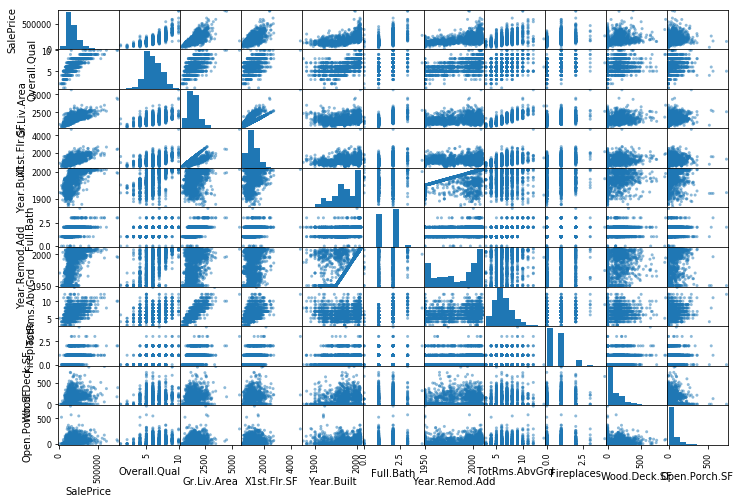

In [131]:
attributes = ["SalePrice", "Overall.Qual", "Gr.Liv.Area", "X1st.Flr.SF", "Year.Built", "Full.Bath", "Year.Remod.Add", "TotRms.AbvGrd", "Fireplaces", "Wood.Deck.SF", "Open.Porch.SF"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

Z matrycy korelacji biorę 10 najistotniejszych cech. Wkładam je do tablicy X. W tablicy y znajdują się ceny nieruchomości. Dzielę dane na zbiór danych do nauki i do weryfikacji w proporcji 30/70.

In [132]:
X = data[["Overall.Qual", "Gr.Liv.Area", "X1st.Flr.SF", "Year.Built", "Full.Bath", "Year.Remod.Add", "TotRms.AbvGrd", "Fireplaces", "Wood.Deck.SF", "Open.Porch.SF"]]
# X = data[["Gr.Liv.Area", "X1st.Flr.SF", "Year.Built"]]
y = data["SalePrice"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Dla modeli regresji: liniowa, ridge i lasso uczę model. W przypadku regresji Ridge i Lasso dobieram parametr alpha. Weryfikację dokładności predykcji modelu zweryfikuję licząc dla każdego z modeli wartości parametrów MAE, RMSE, R2.

- MAE - średnia sumy wartości bezwzględnych wartości prawdziwej i wyliczonej
- RMSE - pierwisatek błędu średniokwadratowego (pierwiastek ze średniej kwadratów błędów poszczególnych par - prawdziwej i wyliczonej)
- R2 - współczynnik determinacji

Dobry model ma pierwsze 2 cechy możliwie niewielkie (przyjmują wartości w takiej samej skali jak obserwacje, tzn możemy je odnieść do ceny w USD). Współczynnik R2 przyjmuje wartości <0-1> i dobry model cechuje się współczynnikiem R2 bliskim 1.

### Model regresji liniowej.

In [133]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)
mae_linear = metrics.mean_absolute_error(y_test, y_pred)
rmse_linear = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_score_linear = metrics.r2_score(y_test, y_pred)
print(f"Regresja liniowa.\nMAE={mae_linear}\nRMSE={rmse_linear}\nr2_score={r2_score_linear}")

Regresja liniowa.
MAE=24303.26006462953
RMSE=34000.655299751306
r2_score=0.8244819103127078


### Model regresji ridge.

In [134]:
ridge = Ridge()
parameters = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 80, 100, 250, 500, 1000]}
ridge_regressor = GridSearchCV(ridge, parameters, cv=5)
ridge_regressor.fit(X_train, y_train)
print(f"Najlepszy wybrany parametr {ridge_regressor.best_params_}")
print(f"Score dla parametru alpha {ridge_regressor.best_score_}")
ridge_regressor = Ridge(alpha=ridge_regressor.best_params_['alpha'])
ridge_regressor.fit(X_train, y_train)
y_pred = ridge_regressor.predict(X_test)
mae_ridge = metrics.mean_absolute_error(y_test, y_pred)
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_score_ridge = metrics.r2_score(y_test, y_pred)
print(f"Regresja ridge.\nMAE={mae_ridge}\nRMSE={rmse_ridge}\nr2_score={r2_score_ridge}")

Najlepszy wybrany parametr {'alpha': 40}
Score dla parametru alpha 0.7825534914723309
Regresja ridge.
MAE=24209.49338625312
RMSE=33987.07404840662
r2_score=0.8246221005052747


### Model regresji lasso.

In [135]:
lasso = Lasso()
parameters = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 80, 100, 250, 500, 1000]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5)
lasso_regressor.fit(X_train,y_train)
print(f"Najlepszy wybrany parametr {lasso_regressor.best_params_}")
print(f"Score dla parametru alpha {lasso_regressor.best_score_}")
lasso_regressor = Lasso(alpha=lasso_regressor.best_params_['alpha'])
lasso_regressor.fit(X_train, y_train)
y_pred = lasso_regressor.predict(X_test)
mae_lasso = metrics.mean_absolute_error(y_test, y_pred)
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_score_lasso = metrics.r2_score(y_test, y_pred)
print(f"Regresja lasso.\nMAE={mae_lasso}\nRMSE={rmse_lasso}\nr2_score={r2_score_lasso}")

Najlepszy wybrany parametr {'alpha': 20}
Score dla parametru alpha 0.7823081355030261
Regresja lasso.
MAE=24300.19260656885
RMSE=34000.07119557238
r2_score=0.8244879407828941


Porównuję uzyskane wyniki na wykresach. Wyniki są bardzo zbliżone, dlatego dla czytelności wykresu ustawiam zakreś osi Y w taki sposób, żeby było widać różnice.

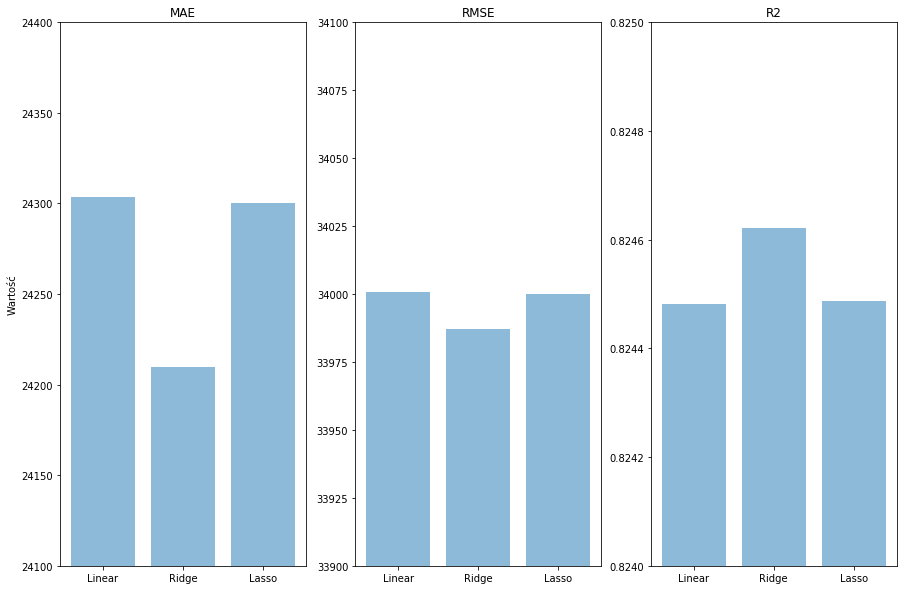

In [136]:
objects = ('Linear', 'Ridge', 'Lasso')
y_pos = np.arange(len(objects))
MAE = [mae_linear, mae_ridge, mae_lasso]
RMSE = [rmse_linear, rmse_ridge, rmse_lasso]
R2= [r2_score_linear, r2_score_ridge, r2_score_lasso]

f, axs = plt.subplots(1,3,figsize=(15,10))

plt.subplot(1,3,1)
plt.bar(y_pos, MAE, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Wartość')
plt.title('MAE')
plt.ylim(24100, 24400)

plt.subplot(1,3,2)
plt.bar(y_pos, RMSE, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('RMSE')
plt.ylim(33900,34100)

plt.subplot(1,3,3)
plt.bar(y_pos, R2, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('R2')
plt.ylim(0.824,0.825)

plt.show()

Porównanie przetestowanych modeli prezentuję za pomocą tabeli.

In [137]:
data = [['Linear',mae_linear, rmse_linear, r2_score_linear],['Ridge',mae_ridge, rmse_ridge, r2_score_ridge],['Lasso',mae_lasso, rmse_lasso, r2_score_lasso]]
df = pd.DataFrame(data,columns=['Model','MAE', 'RMSE', 'R2 Score'])
df.set_index('Model', inplace=True)
df

,MAE,RMSE,R2 Score
Model,,,
Linear,24303.260065,34000.655300,0.824482
Ridge,24209.493386,33987.074048,0.824622
Lasso,24300.192607,34000.071196,0.824488


## Wnioski:
- Modelem, który najlepiej przewiduje cenę nieruchomości (spośród przetestowanych) jest Ridge.
- Pozostałe modele okazały się niewiele gorsze. Ich zdolności predykcji ceny są moim zdaniem bardzo zbliżone.
- Wartości parametru R2 Score (obrazującego siłę korelacji pomiędzy modelem a rzeczywistymi danymi) dla wszystkich modeli przekracza 0,82. Taka dokładność wydaje się być satysfakcjonująca do rozwiązywania tego rodzaju problemów.